In [ ]:
# Necessary pip installs

!pip install scanpy
!pip install anndata

In [106]:
# Load all of our necessary imports

import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import anndata as anndata
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Load the data
# Source: Aging Fly Cell Atlas (https://hongjielilab.org/afca/)

adata = anndata.read_h5ad('adata_filtered.h5ad')

# View the features of adata
adata

AnnData object with n_obs × n_vars = 4619 × 15992
    obs: 'tissue', 'sex', 'age', 'sex_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_mt', 'dataset', 'fca_annotation', 'afca_annotation', 'afca_annotation_broad'
    uns: 'afca_annotation_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [ ]:
# View the labels for each sample
adata.obs

,tissue,sex,age,sex_age,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,log1p_n_genes_by_counts,log1p_total_counts,log1p_total_counts_mt,dataset,fca_annotation,afca_annotation,afca_annotation_broad
AACGAAACAGTGCCTG-1_AFCA_female_head_30_S1,head,female,30,female_30,537,1199.0,6.0,0.500417,6.287859,7.090077,1.945910,AFCA,nan,ensheathing glial cell,glial cell
ACCAAACCAGCGGTTC-1_AFCA_female_head_30_S1,head,female,30,female_30,693,1482.0,3.0,0.202429,6.542472,7.301822,1.386294,AFCA,nan,ensheathing glial cell,glial cell
AGTGACTCAAACACCT-1_AFCA_female_head_30_S1,head,female,30,female_30,317,636.0,0.0,0.000000,5.762051,6.456769,0.000000,AFCA,nan,ensheathing glial cell,glial cell
AGTGACTGTCCTCAGG-1_AFCA_female_head_30_S1,head,female,30,female_30,433,865.0,1.0,0.115607,6.073045,6.763885,0.693147,AFCA,nan,ensheathing glial cell,glial cell
ATCTTCATCGGTTAGT-1_AFCA_female_head_30_S1,head,female,30,female_30,489,932.0,5.0,0.536481,6.194405,6.838405,1.791759,AFCA,nan,ensheathing glial cell,glial cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCAGTAAGATTG-f7ed0992__FCA15_Female_head_adult,head,female,5,female_5,368,569.0,6.0,1.054482,5.910797,6.345636,1.945910,FCA,ensheathing glial cell,ensheathing glial cell,glial cell
TTGTTGTAGGTCGTCC-f7ed0992__FCA15_Female_head_adult,head,female,5,female_5,344,546.0,1.0,0.183150,5.843544,6.304449,0.693147,FCA,ensheathing glial cell,ensheathing glial cell,glial cell
TTTACTGCAGCGCTTG-f7ed0992__FCA15_Female_head_adult,head,female,5,female_5,430,764.0,0.0,0.000000,6.066108,6.639876,0.000000,FCA,ensheathing glial cell,ensheathing glial cell,glial cell
TTTAGTCCATGTTCAG-f7ed0992__FCA15_Female_head_adult,head,female,5,female_5,635,1142.0,3.0,0.262697,6.455199,7.041412,1.386294,FCA,ensheathing glial cell,ensheathing glial cell,glial cell


In [ ]:
# Check the gene expression counts for the first sample
print(adata.var)
print(adata.X[0])

Empty DataFrame
Columns: []
Index: [128up, 14-3-3epsilon, 14-3-3zeta, 140up, 18SrRNA-Psi:CR41602, 18w, 26-29-p, 28SrRNA-Psi:CR40596, 28SrRNA-Psi:CR40741, 28SrRNA-Psi:CR41609, 28SrRNA-Psi:CR45848, 28SrRNA-Psi:CR45851, 28SrRNA-Psi:CR45853, 28SrRNA-Psi:CR45855, 28SrRNA-Psi:CR45859, 28SrRNA-Psi:CR45860, 2mit, 312, 4E-T, 5-HT1A, 5-HT1B, 5-HT2A, 5-HT2B, 5-HT7, 5.8SrRNA-Psi:CR45849, 5.8SrRNA-Psi:CR45854, 5.8SrRNA-Psi:CR45857, 5.8SrRNA-Psi:CR45863, 5PtaseI, 5SrRNA-Psi:CR33363, 5SrRNA-Psi:CR33371, 7B2, 7SLRNA:CR42652, 825-Oak, A16, AANAT1, AANATL2, AANATL3, AANATL4, AANATL7, ABCA, ABCB7, ABCD, ACC, ACXA, ACXB, ACXC, ACXD, ACXE, ADD1, ADPS, AGBE, AGO1, AGO2, AGO3, AIF, AIMP1, AIMP2, AIMP3, ALiX, AMPKalpha, AMPdeam, AOX1, AOX2, AOX3, AOX4, AP-1-2beta, AP-1gamma, AP-1mu, AP-1sigma, AP-2alpha, AP-2mu, AP-2sigma, APC10, APC4, APC7, APP-BP1, AQP, ARY, ASPP, ATP6AP2, ATP7, ATP8A, ATP8B, ATPCL, ATPsynB, ATPsynC, ATPsynCF6, ATPsynCF6L, ATPsynD, ATPsynE, ATPsynF, ATPsynG, ATPsynGL, ATPsynO, ATPsynbeta, A

In [109]:
# Perform differential gene analysis
sc.tl.rank_genes_groups(adata, groupby='age')

# Extract results into a DataFrame
result = adata.uns['rank_genes_groups']
pvals = result['pvals_adj']
logfc = result['logfoldchanges']

# Create DataFrame for plotting
volcano_df_5to30 = pd.DataFrame({
    'Gene': result['names']['5'],
    'Log2FoldChange': logfc['5'],
    'P_value': pvals['5'],
    '-log10(P_value)': -np.log10(pvals['5'])
})

# sort volcano_df_5to30 by -log(P_value)
volcano_df_5to30 = volcano_df_5to30.sort_values(by='-log10(P_value)', ascending=False)

In [110]:
# Volcano plot to see significant differently expressed genes and fold change

fig = px.scatter(
        volcano_df_5to30.iloc[0:1000, :],
        x='Log2FoldChange',
        y='-log10(P_value)',
        hover_data=['Gene'],
        title=f'Volcano Plot of Gene Expression Changes Between 5d and 30d in Ensheathing Glia',
        color='-log10(P_value)',
        template='plotly_white'
)

significance_threshold = -np.log10(0.05)
fig.add_trace(
    go.Scatter(
        x=[min(volcano_df_5to30['Log2FoldChange']), max(volcano_df_5to30['Log2FoldChange'])],
        y=[significance_threshold, significance_threshold],
        mode="lines",
        line=go.scatter.Line(color="red", dash="dash"),
        showlegend=False
    )
)

fig.show()

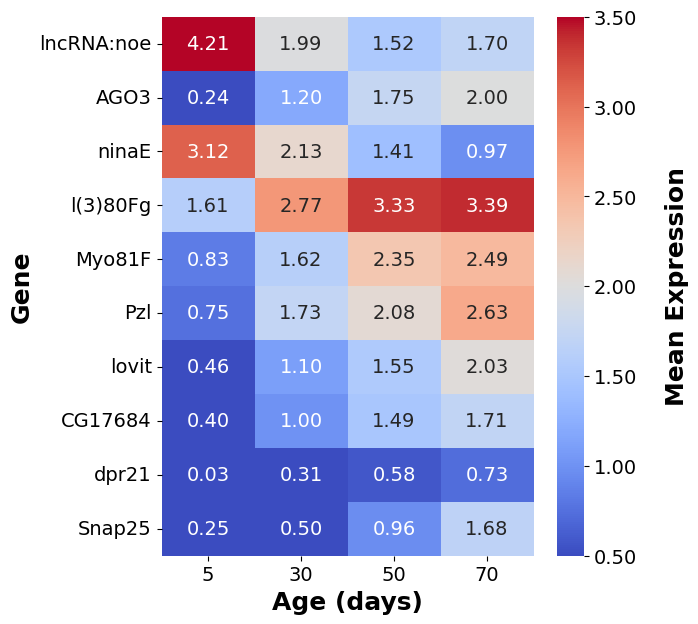

In [125]:
# Heat map to show expression

df = pd.DataFrame(columns=['Gene', '5', '30', '50', '70'])
all_genes = volcano_df_5to30.iloc[:10, :]['Gene'].values
df['Gene'] = all_genes

for age in [5, 30, 50, 70]:
    cell_data = []
    for gene in all_genes:
        age_filter = adata[(np.array(adata.obs['age'], dtype=int) == age)]
        temp = age_filter.X[:, np.where(adata.var_names == gene)[0][0]].toarray().flatten()

        # total expression
        val = np.mean(temp[temp >= 0]) if len(temp[temp >= 0]) > 0 else 0
        cell_data.append(val)

    df[str(age)] = cell_data


# Create a heatmap
plt.figure(figsize=(6, 7))
sns.heatmap(df.set_index('Gene'), cmap='coolwarm', annot=True, fmt=".2f", vmin=0.5, vmax=3.5,
            annot_kws={"size": 14}, cbar_kws={'label': 'Expression Level', 'format': '%.2f'})

plt.xlabel('Age (days)', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)

plt.ylabel('Gene', fontsize=18, fontweight='bold')
plt.yticks(fontsize=14, rotation = 0)

# Make the numbers on the legend bigger
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Mean Expression', size=18, weight='bold', labelpad=20)

# Show plot
plt.show()

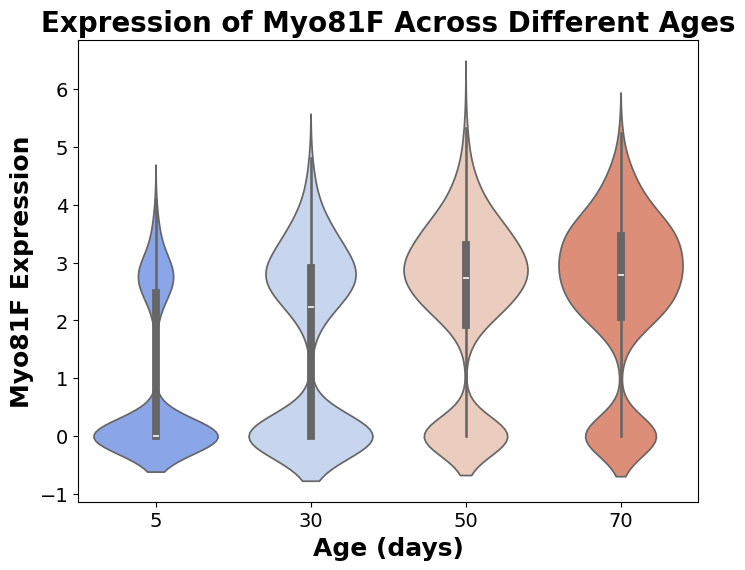

In [126]:
# Challenge: Violin plot for Myo81F gene

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming adata contains your gene expression data
gene_name = 'Myo81F'
ages = [5, 30, 50, 70]
gene_data = {'Age': [], 'Expression': []}

# Collect gene expression data for Myo81F across ages
for age in ages:
    age_filter = adata[(np.array(adata.obs['age'], dtype=int) == age)]
    temp = age_filter.X[:, np.where(adata.var_names == gene_name)[0][0]].toarray().flatten()

    # Add age and expression to gene_data
    gene_data['Age'].extend([age] * len(temp))
    gene_data['Expression'].extend(temp)

# Convert to DataFrame for plotting
df_gene = pd.DataFrame(gene_data)

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Age', y='Expression', data=df_gene, palette='coolwarm')
plt.xlabel('Age (days)', fontsize=18, fontweight='bold')
plt.ylabel(f'{gene_name} Expression', fontsize=18, fontweight='bold')
plt.title(f'Expression of {gene_name} Across Different Ages', fontsize=20, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()
